# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

The prior would be: 
$$
w\sim {\cal N}(w^*,\sigma^*)
$$
The conjugate prior is another distribution that helps mathematically to distribute, made with enough information in order to obtain a conjugate posterior

# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?

In [9]:
#a) Ridge Regression, prior is Normal (Gaussian) Distribution

In [131]:
#b) Lasso Regression, prior is Laplace Distribution

# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

In [ ]:
#a) Ridge posses an analytic solution in the closed form
#b) Lasso has that advantage
#c) for Lambda = 0 
#d) The validation set

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

In [ ]:
#Using Theory from class about the posterior:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pymc3 as pm
import numpy as np
from numpy import random
import random as rnd
from scipy import stats
from pandas.stats.api import ols
import pylab
from sklearn import linear_model

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [21]:
#Where sigma = 1, simga* = 1, w* = 5, xi = 2, yi = 12, i = 1 (one simple observation)
# mu = 29/5 and sigma = 1/sqrt(5)
#This is the probability that w<5
print stats.norm.cdf(5.0,loc=29.0/5,scale=1/np.sqrt(5.0))

0.0368191350602


# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [1]:
import pandas as pd
data_train=pd.read_csv("Homework1_training.csv")
data_test=pd.read_csv("Homework1_test.csv")

In [35]:
data_train1=pd.DataFrame({'X0':data_train['0'],'X1':data_train['1'],'X2':data_train['2'],'X3':data_train['3'],'X4':data_train['4'],'X5':data_train['5'],'X6':data_train['6'],'X7':data_train['7'],'X8':data_train['8'],'X9':data_train['9'],'X10':data_train['10'],'X11':data_train['11'],'X12':data_train['12'],'X13':data_train['13'],'X14':data_train['14'],'X15':data_train['15'],'X16':data_train['16'],'X17':data_train['17'],'X18':data_train['18'],'X19':data_train['19'],'X20':data_train['20'],'X21':data_train['21'],'X22':data_train['22'],'X23':data_train['23'],'X24':data_train['24'],'X25':data_train['25'],'X26':data_train['26'],'X27':data_train['27'],'X28':data_train['28'],'X29':data_train['29'],'X30':data_train['30'],'X31':data_train['31'],'X32':data_train['32'],'X33':data_train['33'],'X34':data_train['34'],'X35':data_train['35'],'X36':data_train['36'],'X37':data_train['37'],'X38':data_train['38'],'X39':data_train['39'],'Y':data_train['40']})
data_test1=pd.DataFrame({'X0':data_test['0'],'X1':data_test['1'],'X2':data_test['2'],'X3':data_test['3'],'X4':data_test['4'],'X5':data_test['5'],'X6':data_test['6'],'X7':data_test['7'],'X8':data_test['8'],'X9':data_test['9'],'X10':data_test['10'],'X11':data_test['11'],'X12':data_test['12'],'X13':data_test['13'],'X14':data_test['14'],'X15':data_test['15'],'X16':data_test['16'],'X17':data_test['17'],'X18':data_test['18'],'X19':data_test['19'],'X20':data_test['20'],'X21':data_test['21'],'X22':data_test['22'],'X23':data_test['23'],'X24':data_test['24'],'X25':data_test['25'],'X26':data_test['26'],'X27':data_test['27'],'X28':data_test['28'],'X29':data_test['29'],'X30':data_test['30'],'X31':data_test['31'],'X32':data_test['32'],'X33':data_test['33'],'X34':data_test['34'],'X35':data_test['35'],'X36':data_test['36'],'X37':data_test['37'],'X38':data_test['38'],'X39':data_test['39'],'Y':data_test['40']})

In [46]:
lm = smf.ols(formula = 'Y ~ X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26+X27+X28+X29+X30+X31+X32+X33+X34+X35+X36+X37+X38+X39-1',data=data_train1).fit()
print lm.summary()
lmytest = data_test1.X0*lm.params.X0+data_test1.X1*lm.params.X1+data_test1.X2*lm.params.X2+data_test1.X3*lm.params.X3+data_test1.X4*lm.params.X4+data_test1.X5*lm.params.X5+data_test1.X6*lm.params.X6+data_test1.X7*lm.params.X7+data_test1.X8*lm.params.X8+data_test1.X9*lm.params.X9+data_test1.X10*lm.params.X10+data_test1.X11*lm.params.X11+data_test1.X12*lm.params.X12+data_test1.X13*lm.params.X13+data_test1.X14*lm.params.X14+data_test1.X15*lm.params.X15+data_test1.X16*lm.params.X16+data_test1.X17*lm.params.X17+data_test1.X18*lm.params.X18+data_test1.X19*lm.params.X19+data_test1.X20*lm.params.X20+data_test1.X21*lm.params.X21+data_test1.X22*lm.params.X22+data_test1.X23*lm.params.X23+data_test1.X24*lm.params.X24+data_test1.X25*lm.params.X25+data_test1.X26*lm.params.X26+data_test1.X27*lm.params.X27+data_test1.X28*lm.params.X28+data_test1.X29*lm.params.X29+data_test1.X30*lm.params.X30+data_test1.X31*lm.params.X31+data_test1.X32*lm.params.X32+data_test1.X33*lm.params.X33+data_test1.X34*lm.params.X34+data_test1.X35*lm.params.X35+data_test1.X36*lm.params.X36+data_test1.X37*lm.params.X37+data_test1.X38*lm.params.X38+data_test1.X39*lm.params.X39
#R Squared is 1, but all Coefficients are NaN (Over Train)
R2Test=1 - sum(pow(lmytest - data_test1.Y, 2)) / sum(pow(data_test1.Y - np.mean(data_test1.Y), 2))
print R2Test
#R Squares for Test is:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 15 Feb 2016   Prob (F-statistic):                nan
Time:                        01:57:56   Log-Likelihood:                 124.30
No. Observations:                  30   AIC:                            -188.6
Df Residuals:                       0   BIC:                            -146.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X0          1.798e+10        inf          0        n

# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [75]:
Ridge=linear_model.Ridge(fit_intercept=True,alpha=4000) #try Ridge with an arbitrary regularization parameter lambda=1
X_train=data_train1.transpose()[0:40].transpose()
y_train=data_train1['Y']
Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS (train) Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
############################################################################    \
X_test=data_test1.transpose()[0:40].transpose()
y_test=data_test1['Y']
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS (test) Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS (train) Ridge is: 0.915083067181
The R-squared we found for OS (test) Ridge is: 0.513596031482


In [76]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=40) #try Ridge with an arbitrary regularization parameter lambda=1
X_train=data_train1.transpose()[0:40].transpose()
y_train=data_train1['Y']
Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS (train) Lasso is: {0}".format(R_2_IS_Lasso))

Lasso_coef=Lasso.coef_
############################################################################    \
X_test=data_test1.transpose()[0:40].transpose()
y_test=data_test1['Y']
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS (test) Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS (train) Lasso is: 0.869184621167
The R-squared we found for OS (test) Lasso is: 0.651017438134


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

Populating the interactive namespace from numpy and matplotlib


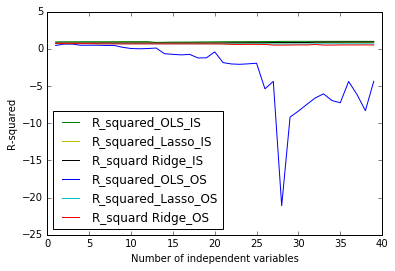

In [130]:
#for OLS, Lasso and Ridge
R2_Ols_IS = []
R2_Ols_OS = []
R2_Ridge_IS = []
R2_Ridge_OS = []
R2_Lasso_IS = []
R2_Lasso_OS = []
RangeR2 = range(1,40) 
data_train2 = data_train.drop('Unnamed: 0',1)
data_test2  = data_test.drop('Unnamed: 0',1)
y_test=data_test1['Y']
y_train=data_train1['Y']
for m in RangeR2:
    #OLS
    FormOls='Y ~ -1'
    for k in range(0,m):
        FormOls = FormOls + '+X' + str(k)
    lm = smf.ols(formula= FormOls,data = data_train1).fit()
    R2_Ols_IS.append(lm.rsquared)
    lmy = lm.predict(data_test1)
    R2_Ols_OS.append(1 - sum(pow(lmy - data_test1.Y, 2)) / sum(pow(data_test1.Y - np.mean(data_test1.Y), 2)))
    
    #Ridge
    Ridge=linear_model.Ridge(fit_intercept=True,alpha=4000) #try Ridge with an arbitrary regularization parameter lambda=4000
    X_train=data_train2.transpose()[0:m+1].transpose()
    Ridge.fit(X_train,y_train)
    # In the sample:
    p_IS=Ridge.predict(X_train)
    err_IS=p_IS-y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    R2_Ridge_IS.append(R_2_IS_Ridge)
    X_test=data_test2.transpose()[0:m+1].transpose()
    #Out of sample
    p_OS=Ridge.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    R2_Ridge_OS.append(R_2_OS_Ridge)
    
    #Lasso
    Lasso=linear_model.Lasso(fit_intercept=True,alpha=40) #try Lasso with an arbitrary regularization parameter lambda=40
    X_train=data_train2.transpose()[0:m+1].transpose()
    Lasso.fit(X_train,y_train)
    # In the sample:
    p_IS=Lasso.predict(X_train)
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    R2_Lasso_IS.append(R_2_IS_Lasso)

    X_test=data_test2.transpose()[0:m+1].transpose()
    #Out of sample
    p_OS=Lasso.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    R2_Lasso_OS.append(R_2_OS_Lasso)
%pylab inline
pylab.plot(RangeR2,R2_Ols_IS,'g',label='R_squared_OLS_IS')
pylab.plot(RangeR2,R2_Lasso_IS,'y',label='R_squared_Lasso_IS')
pylab.plot(RangeR2,R2_Ridge_IS,'k',label='R_squard Ridge_IS')

pylab.plot(RangeR2,R2_Ols_OS,'b',label='R_squared_OLS_OS')
pylab.plot(RangeR2,R2_Lasso_OS,'c',label='R_squared_Lasso_OS')
pylab.plot(RangeR2,R2_Ridge_OS,'r',label='R_squard Ridge_OS');

pylab.legend(loc='lower right')
pylab.xlabel('Number of independent variables')
pylab.ylabel('R-squared')
pylab.legend(loc='lower left')
pylab.figure(figsize=(15,10))
pylab.show();

# Extracredit (25% of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

In [158]:
#Find the Alpha and report best test performance for Ridge/Lasso.
#USING FUNCTION IN CLASS and modifying it as required
rnd.seed(2016)
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    
    #model=1 -Ridge, 2-Lasso
    #X_train, y_train is training set
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size/ total training size / HERE IS THE SPLIT 60% - 40%
    #Graph: plot the graph of R^2 values for different lambda
##############################################################################################################################    
    
    R_2_OS=[] #make a list to store R-squared. We need in end to pick the lambda having the biggest R2.
    
    validation_index=rnd.sample(list(range(len(X_train))),int(len(X_train)*p) ) #choose some rows for the validation sample    
    training_index=[x for x in list(range(len(X_train))) if x not in validation_index] # Use the rest of rows as a training sample
    
    
    X_validation=X_train.loc[validation_index]
    y_validation=y_train[validation_index]

    X_train0=X_train.loc[training_index]
    y_train0=y_train[training_index]
    
    
    for a in lambdas:
        if model==1:
            RM=linear_model.Ridge(fit_intercept=True, alpha=a)
            model_label='Ridge'
        else:
            RM=linear_model.Lasso(fit_intercept=True, alpha=a)
            model_label='Lasso'
        RM.fit(X_train0,y_train0)  #fit the regularization model
        
        y_predict=RM.predict(X_validation) #compute the prediction for the validation sample 
        err_OS=y_predict-y_validation
        R_2_OS_=1-np.var(err_OS)/np.var(y_validation)
        R_2_OS.append(R_2_OS_)
    
#Find the alpha that c.r.t the biggest R^2
    best_R2 = max(R_2_OS)
    for i in range(len(R_2_OS)):
        if R_2_OS[i]==best_R2:
            best_lambda=lambdas[i]
    #print("The alpha we found for Ridge is:{0}".format(l))
    
    #Graph
    if Graph==True:
        pylab.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            pylab.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            pylab.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        pylab.plot(l,R_2_OS,'b',label=model_label)
        pylab.legend(loc='upper right')
        pylab.ylabel('R-squared')
        pylab.axvline(bl,color='r',linestyle='--')

        pylab.show()
    #Running over the entire training set
    if model==1:
        RM=linear_model.Ridge(fit_intercept=True, alpha=best_lambda)
        model_label='Ridge'
    else:
        RM=linear_model.Lasso(fit_intercept=True, alpha=best_lambda)
        model_label='Lasso'
    RM.fit(X_train,y_train)  #fit the regularization model
     
    #Test over the test set    
    y_predict=RM.predict(X_test) #compute the prediction for the validation sample 
    err_OS=y_predict-y_test
    Rep_R2=1-np.var(err_OS)/np.var(y_test)
    
    
    return Rep_R2,best_lambda

Optimal lambda for Ridge in Split 1 = 9907.08092222, with an R2 = 0.566772058992
Optimal lambda for Ridge in Split 2 = 50470.5728029, with an R2 = 0.671817407371
Optimal lambda for Ridge in Split 3 = 22361.0386375, with an R2 = 0.617505718802
Optimal lambda for Ridge in Split 4 = 12995.5440077, with an R2 = 0.583093477177
Optimal lambda for Ridge in Split 5 = 4389.34228371, with an R2 = 0.51926679452
Optimal lambda for Ridge in Split 6 = 113915.939252, with an R2 = 0.718575514001
Optimal lambda for Ridge in Split 7 = 18660.6228788, with an R2 = 0.605782306937
Optimal lambda for Ridge in Split 8 = 1237.19625657, with an R2 = 0.411671917939
Optimal lambda for Ridge in Split 9 = 20427.2100198, with an R2 = 0.611615419895
Optimal lambda for Ridge in Split 10 = 24477.9413569, with an R2 = 0.623447813419


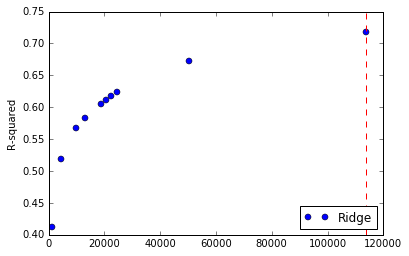

In [165]:
#select best lambda for Ridge
lamRidgeSel = []
R2_Ridge = []
for j in range(1,11):
    lambdas = np.linspace(-5,13,200)
    lambdas=[math.exp(i) for i in lambdas]
    r_optimal,lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=False)
    lamRidgeSel.append(lambda_r_optimal)
    R2_Ridge.append(r_optimal)
    print('Optimal lambda for Ridge in Split {0} = {1}, with an R2 = {2}'.format(j,lambda_r_optimal,r_optimal))
pylab.plot(lamRidgeSel,R2_Ridge,'o',label='Ridge')
pylab.legend(loc='lower right')
pylab.ylabel('R-squared')
idx = R2_Ridge.index(max(R2_Ridge))
pylab.axvline(lamRidgeSel[idx],color='r',linestyle='--')
pylab.show()

Optimal lambda for Lasso in Split 1 = 46.6050331455, with an R2 = 0.665444456567
Optimal lambda for Lasso in Split 2 = 0.323634429726, with an R2 = -0.301327619974
Optimal lambda for Lasso in Split 3 = 27.7048652953, with an R2 = 0.617505508418
Optimal lambda for Lasso in Split 4 = 83.0628865303, with an R2 = 0.719603658255
Optimal lambda for Lasso in Split 5 = 43.9881200232, with an R2 = 0.660089572341
Optimal lambda for Lasso in Split 6 = 156.847874269, with an R2 = 0.738407371366
Optimal lambda for Lasso in Split 7 = 197.637028866, with an R2 = 0.748411462275
Optimal lambda for Lasso in Split 8 = 26.1492130267, with an R2 = 0.613585349084
Optimal lambda for Lasso in Split 9 = 58.7249290052, with an R2 = 0.687250383446
Optimal lambda for Lasso in Split 10 = 176.065180699, with an R2 = 0.743769806219


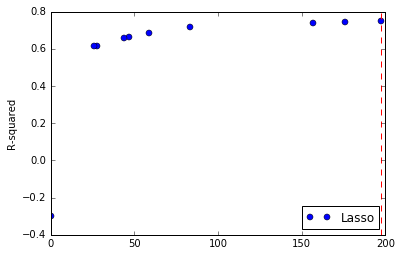

In [166]:
#select best lambda for Lasso
lamLassoSel = []
R2_Lasso = []
for j in range(1,11):
    lambdas = np.linspace(-5,6.5,200)
    lambdas=[math.exp(i) for i in lambdas]
    r_optimal,lambda_r_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=False)
    lamLassoSel.append(lambda_r_optimal)
    R2_Lasso.append(r_optimal)
    print('Optimal lambda for Lasso in Split {0} = {1}, with an R2 = {2}'.format(j,lambda_r_optimal,r_optimal))
pylab.plot(lamLassoSel,R2_Lasso,'o',label='Lasso')
pylab.legend(loc='lower right')
pylab.ylabel('R-squared')
idx = R2_Lasso.index(max(R2_Lasso))
pylab.axvline(lamLassoSel[idx],color='r',linestyle='--')
pylab.show()